# Description of the project

<b> Selecting a location for the well.</b>

<b> Study description: </b>
Given the data of 3 regions, it is necessary to highlight the most promising region with the lowest risk of loss.

<b>Research purpose:</b>
Build machine learning models for 3 regions, check forecasting with RMSE metric and find the best option, profit and risk. Apply bootstrap technique for normal distribution.

<b>Research objectives:</b>
1. Examine <a href = '#data'>input data</a>,
2. <a href = '#sep'>Split data </a> into training, validation and test sets,
3. Calculate sufficient and <a href = '#volume_max'>breakeven</a> volume of raw materials given the input data,
4. Calculate <a href = '#profit'>profit</a> based on predicted data,
6. Calculate risks and <a href = '#bootstrap'>profit</a> for each region.

<b> Initial data: </b>
    
Data:
    
- datasets/geo_data_0.csv,
- datasets/geo_data_1.csv,
- datasets/geo_data_2.csv

Signs:
    
- id - unique identifier of the well;
- f0, f1, f2 - three signs of points (it doesn't matter what they mean, but the signs themselves are significant);

Target feature:
    
- product - the volume of reserves in the well (thousand barrels).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<a id = 'data'></a>
## Data preparation

In [2]:
region1 = pd.read_csv('/datasets/geo_data_0.csv')
region2 = pd.read_csv('/datasets/geo_data_1.csv')
region3 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
WHOLE_NUMBER = 500
NUMBER = 200
GROSS_PROFIT = 450000
BUDGET = (10**10)
RISK_RATE = 2.5

### Region 1

In [4]:
region1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
region1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [6]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
# проверка пропусков
region1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

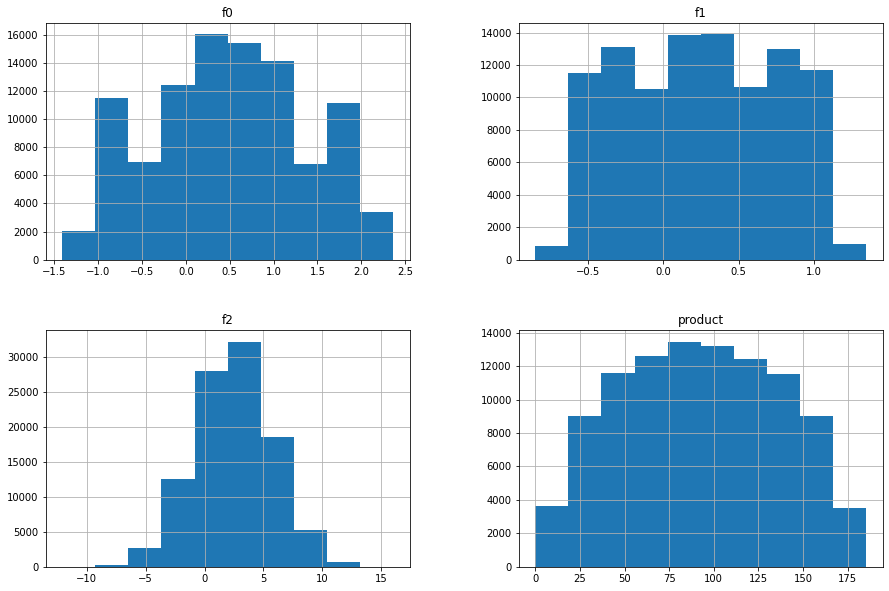

In [8]:
# распредление данных
region1.hist(figsize = (15, 10))
plt.show()

The histogram shows that there is no normal distribution for features f0, f1, f2. While product has a normal distribution.

Text(0.5, 1.0, 'Регион 1: Диаграмма размаха объема запасов')

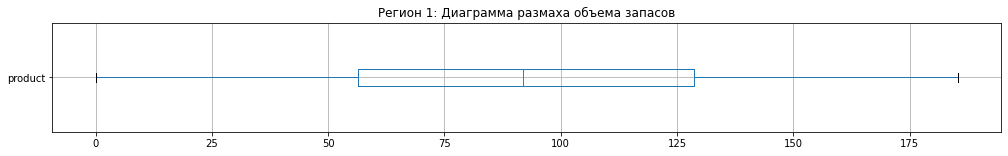

In [9]:
# ящик с усами для аномальных значений
ax = region1[['product']].boxplot(vert = False, figsize = (17,2))
ax.set_title('Регион 1: Диаграмма размаха объема запасов')

In [10]:
# проверка дубликатов
region1.duplicated().value_counts()

False    100000
dtype: int64

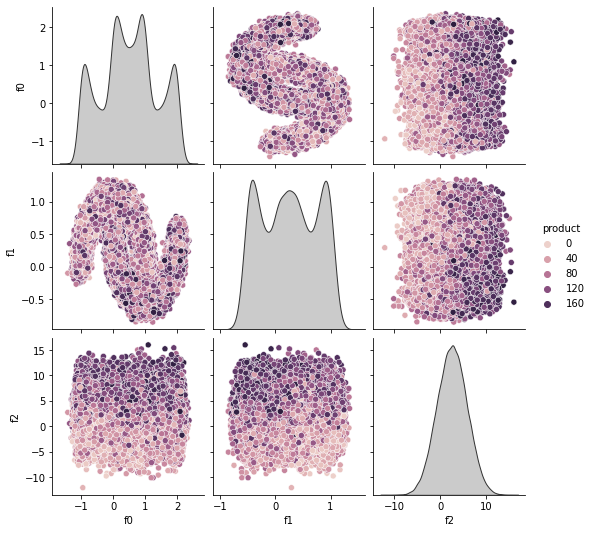

In [11]:
# относительное распределение
sns.pairplot(region1, hue = 'product', diag_kws={"hue": None, "color": ".2"})

### Region 2

In [12]:
region2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [13]:
region2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [14]:
region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [15]:
region2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

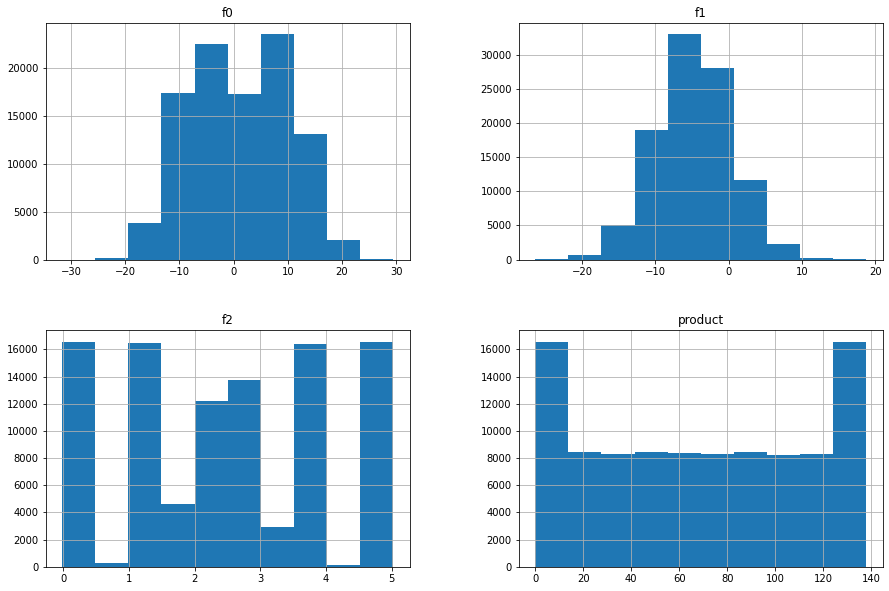

In [16]:
region2.hist(figsize = (15, 10))
plt.show()

Text(0.5, 1.0, 'Регион 2: Диаграмма размаха объема запасов')

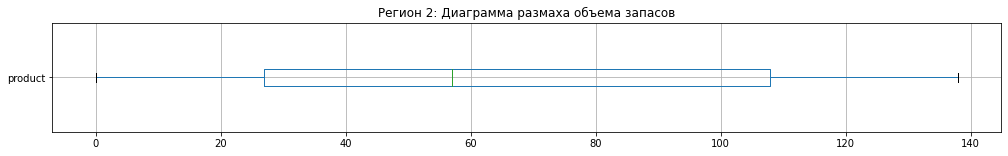

In [17]:
ax = region2[['product']].boxplot(vert = False, figsize = (17, 2))
ax.set_title('Регион 2: Диаграмма размаха объема запасов')

In [18]:
region2.duplicated().value_counts()

False    100000
dtype: int64

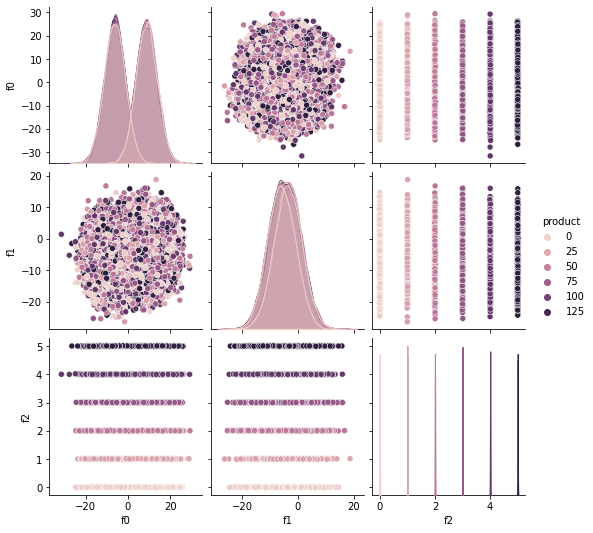

In [19]:
sns.pairplot(region2, hue = 'product')

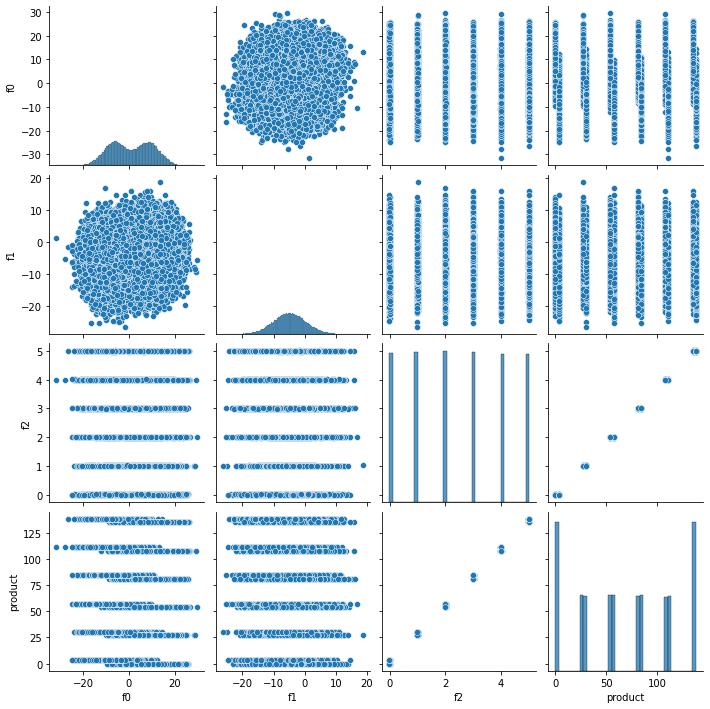

In [20]:
sns.pairplot(region2)

- There are no missing values,
- No duplicates
- The features are not normally distributed.

### Region 3

In [21]:
region3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [22]:
region3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [23]:
region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [24]:
region3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

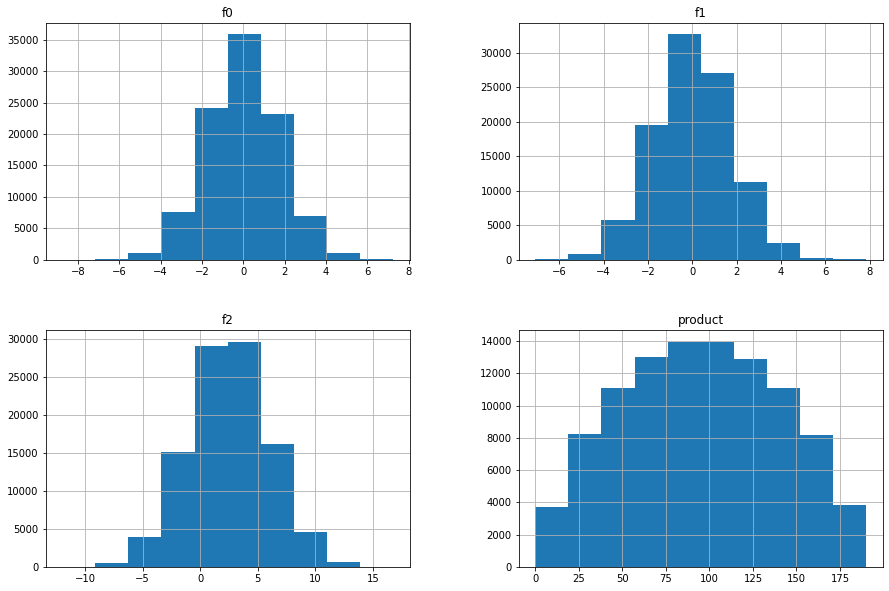

In [25]:
region3.hist(figsize = (15, 10))
plt.show()

Text(0.5, 1.0, 'Регион 3: Диаграмма размаха объема запасов')

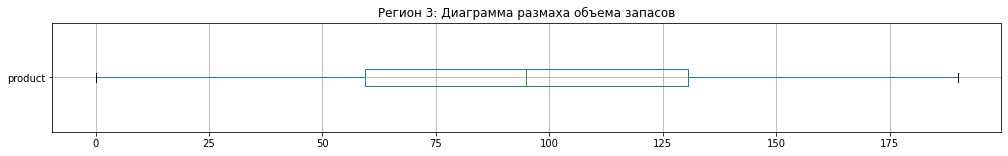

In [26]:
ax = region3[['product']].boxplot(vert = False, figsize = (17, 2))
ax.set_title('Регион 3: Диаграмма размаха объема запасов')

In [27]:
region3.duplicated().value_counts()

False    100000
dtype: int64

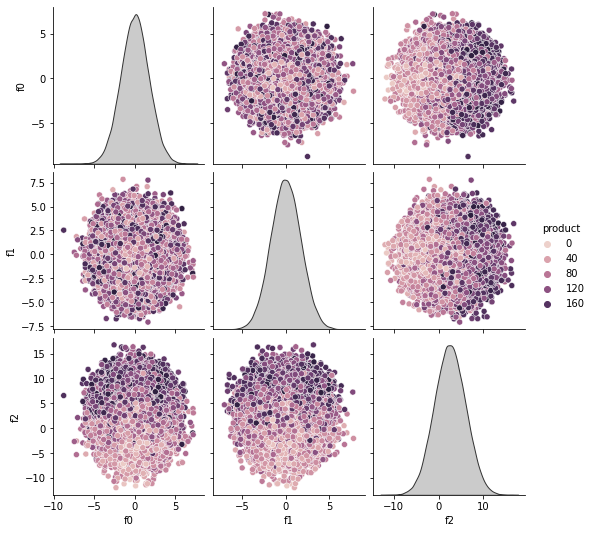

In [28]:
sns.pairplot(region3, hue = 'product', diag_kws={"hue": None, "color": ".2"})

- There are no passes
- There are no duplicates,
- Looks like a normal distribution.

<a id = 'sep'></a>
## Training the model

Splitting the sample in the ratio of 75:25 into training and validation samples. In this case, it is necessary to pre-distribute the features into features: f0, f1, f2 and target: product. That is, we get rid of the id attribute.

In [29]:
# функция для разбиения выборок
def data_split(data):
    
    # избавляемся от id и передаем признаки в features и target
    features = data.drop(['product', 'id'], axis = 1)
    target = data['product']
    
    # разделяем выборку на обучающую и валидационные выборки с размером 0.25
    features_train, features_valid, target_train, target_valid = \
    train_test_split(features, target, test_size = 0.25, random_state = 1)
    
    # проверка размера выборок
    display(f'Обучающая выборка:  {features_train.shape, target_train.shape}')
    display(f'Валидационная выборка:  {features_valid.shape, target_valid.shape}')
    
    return features_train, features_valid, target_train, target_valid

In [30]:
# функиця высчитывает rmse на предсказанных данных
def pred_rmse(f_train, f_valid, t_train, t_valid):
    
    # обучаем модель Линейной Регрессии
    model = LinearRegression()
    model.fit(f_train, t_train)
    
    # предсказанные значения preds
    preds = model.predict(f_valid)
    
    display(f'Средний запас действительного сырья: {round(t_train.mean(), 1)} тыс. баррелей')
    display(f'Средний запас предсказанного сырья: {round(preds.mean(), 1)} тыс. баррелей')
    display(f'Среднеквадратичная ошибка predict: {round(mean_squared_error(t_valid, preds, squared = False), 2)}')
    display(f'Среднеквадратичная ошибка train: {round(mean_squared_error(t_train, model.predict(f_train), squared = False), 2)}')
    
    # переводим предсказания из array в Series
    return pd.Series(np.array(preds), index = t_valid.index)

### Region 1

In [31]:
f1_train, f1_valid, t1_train, t1_valid = data_split(region1)

'Обучающая выборка:  ((75000, 3), (75000,))'

'Валидационная выборка:  ((25000, 3), (25000,))'

In [32]:
preds1 = pred_rmse(f1_train, f1_valid, t1_train, t1_valid)

'Средний запас действительного сырья: 92.5 тыс. баррелей'

'Средний запас предсказанного сырья: 92.5 тыс. баррелей'

'Среднеквадратичная ошибка predict: 37.74'

'Среднеквадратичная ошибка train: 37.68'

### Region 2

In [33]:
f2_train, f2_valid, t2_train, t2_valid = data_split(region2)

'Обучающая выборка:  ((75000, 3), (75000,))'

'Валидационная выборка:  ((25000, 3), (25000,))'

In [34]:
preds2 = pred_rmse(f2_train, f2_valid, t2_train, t2_valid)

'Средний запас действительного сырья: 68.7 тыс. баррелей'

'Средний запас предсказанного сырья: 69.1 тыс. баррелей'

'Среднеквадратичная ошибка predict: 0.89'

'Среднеквадратичная ошибка train: 0.89'

### Region 3

In [35]:
f3_train, f3_valid, t3_train, t3_valid = data_split(region3)

'Обучающая выборка:  ((75000, 3), (75000,))'

'Валидационная выборка:  ((25000, 3), (25000,))'

In [36]:
preds3 = pred_rmse(f3_train, f3_valid, t3_train, t3_valid)

'Средний запас действительного сырья: 94.9 тыс. баррелей'

'Средний запас предсказанного сырья: 95.0 тыс. баррелей'

'Среднеквадратичная ошибка predict: 39.87'

'Среднеквадратичная ошибка train: 40.12'

The RMSE scores mean that the Region 2 model trained best without overfitting. The average stock of actual and predicted raw materials is the same for all models. However, the high RMSE values in Regions 1 and 3 may be due to the lack of correlation between the traits and the target trait, in contrast to Region 2 and its f2 trait, where there is a correlation.

<a id = 'volume_max'></a>
## Profit calculation

It is required to calculate the profit, without losses for the development of a new well:
- total 500 wells,
- 200 best wells are selected,
- income of 450 000,
- the probability of losses should be less than 2.5%.

gross_profit * volume_max =$ \frac{budget}{number}$

In [37]:
VOLUME_MAX = (BUDGET / (NUMBER * GROSS_PROFIT))
display(f'Объём безубыточной прибыли: {round(VOLUME_MAX, 2)} тыс. баррелей.')

'Объём безубыточной прибыли: 111.11 тыс. баррелей.'

To develop a new well, 3 regions with an average value of the stock of the predicted raw material do not go into a loss. At the same time, in the regions, the maximum value of the volume is: 185.4, 137.9, 190.0 thousand barrels, depending on the well in the region. Let's calculate the average profit and risks during development for each region, compare these values with break-even income.

<a id = 'profit'></a>
## Calculation of profit and risks

The function calculates and returns the profit for the 200 most promising (by forecast) actual wells.

In [38]:
def find_profit_count(preds_valid, target_valid, count = NUMBER):
    
    # выбираем модели с максимальными значениями предсказаний
    probs_sorted = pd.Series(preds_valid).sort_values(ascending = False)
    # соответсвующие целевые значения
    selected = target_valid[probs_sorted.index][:count]
    # подсчет прибыли
    profit = (selected.sum() * GROSS_PROFIT) - BUDGET
     
    return round(profit, 2)

In [39]:
find_profit_count(preds1, t1_valid, 200) 

3260781417.81

In [40]:
find_profit_count(preds2, t2_valid, 200)

2415086696.68

In [41]:
find_profit_count(preds3, t3_valid, 200)

2563093352.17

<a id = 'bootstrap'></a>
### By regions

Since the distribution is not normal, we can make it normal using the bootstrap technique by taking a subsample of 500 data. We calculate the risk of loss (negative income), the average profit and the confidence interval between 2.5 and 97.5 quartiles.

In [42]:
def bootstrap(predictions, target):

    state = np.random.RandomState(1)
    values = []
    
    for i in range(1000):
        
        target_subsample = target.sample(n = 500, replace = True, random_state = state)
        preds_subsample = predictions[target_subsample.index]
        
        target_subsample = target_subsample.reset_index(drop = True)
        preds_subsample = preds_subsample.reset_index(drop = True)
        
        values.append(find_profit_count(preds_subsample, target_subsample, 200))
        
    values = pd.Series(values)
    
    v = (values < 0).mean() 
            
    display(f' Риск убытков: {v * 100}%')       
    display(f'Средняя прибыль: {round((values.mean() / (10**6)), 2)} млн. рублей')
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    display(f'2.5% квантиль: {round((lower / (10**6)), 2)} млн. рублей')
    display(f'97.5% квантиль: {round((upper / (10**6)), 2)} млн. рублей')

In [43]:
bootstrap(preds1, t1_valid)

' Риск убытков: 5.2%'

'Средняя прибыль: 433.01 млн. рублей'

'2.5% квантиль: -100.24 млн. рублей'

'97.5% квантиль: 947.11 млн. рублей'

In [44]:
bootstrap(preds2, t2_valid)

' Риск убытков: 1.0%'

'Средняя прибыль: 475.2 млн. рублей'

'2.5% квантиль: 95.18 млн. рублей'

'97.5% квантиль: 851.62 млн. рублей'

In [45]:
bootstrap(preds3, t3_valid)

' Риск убытков: 7.3%'

'Средняя прибыль: 394.75 млн. рублей'

'2.5% квантиль: -157.82 млн. рублей'

'97.5% квантиль: 914.05 млн. рублей'

It is recommended to choose Region 2, with the lowest risks and high average profit. Risks in Regions 1 and 3 exceed the risk threshold of 2.5%.

# Conclusion

We carried out work on forecasting the profit of wells of the mining company GlavRosGosNeft.

After examining the data and dividing it into training and validation samples, we assessed how normal the distribution models have, how this affects profit and normal distribution using the bootstrap method.

The results of our research:
1. Region 1 - average profit: 433 million rubles, risk of loss: 5.2%, average predicted crude stock: 92.5 thousand barrels,
2. Region 2 - average profit: 475 million rubles, risk of loss: 1.0%, average stock of predicted raw materials: 68.7 thousand barrels,
3. Region 3 - average profit: 395 million rubles, risk of loss: 7.3%, average stock of predicted raw materials: 95.0 thousand barrels,

We can <b>recommend</b> Region 2 for work with the highest profit and the lowest risk of loss.